# Predicting the Likelihood of E-Signing a Loan Based on Financial History


## Overview
Lending companies analyze the financial history of applicants to assess loan eligibility and determine loan terms. Applicants can be acquired either directly via company websites or through partnerships with peer-to-peer (P2P) lending marketplaces like **Upstart**, **Lending Tree**, and **Lending Club**.

## Objective
This project focuses on evaluating the *quality of leads* received from P2P marketplaces.

## Key Aspects:
- **Market:** Loan applicants sourced from intermediary marketplaces.
- **Product:** Loans offered by the company.
- **Goal:** Develop a model to predict the quality of applicants.  
  *Quality applicants* are defined as those who reach a key stage in the loan application process.



### Importing the data

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [86]:
data = pd.read_csv('P39-Financial-Data.csv')

### Variable Description
- **entry_id :** entry id of every single person.
- **age :** age of person.
- **pay_schedule :** indicator of how often applicant going to pay;
                    bi_weekly : by every two.
                    weekly : by every week.
                    semi-monthly : twice a month.
                    monthly : every month.
- **honme_owner :** is he own the house or not. 1 for yes, 0 for no.
- **income :** income of applicant.
- **years_employed :** from how many years the person doing current job.
- **current_address_year :** from how many years the person living on the current address
- **personal_account_m :** how many months the person had the personal account.
- **personal_account_y :** how many years the person had the personal accoutn.
- **has_debt :** is he has debt ?
- **amount_requested :** the loan amount for which applicant request.
- **risk_score :** scores given to the applicant.
- **ext_quanlity_score :** differt score given to the applicant
- **inquires_last_month :** how many inquiries has the user last month.
- **e_signed :** is the person does sesign or not.

# EDA

### Step 1 . Describe and head of the data

In [87]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [88]:
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Step 2. Dealing with missing value.

In [89]:
data.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

The data has not any missing value.

### Step 3. Visualisation

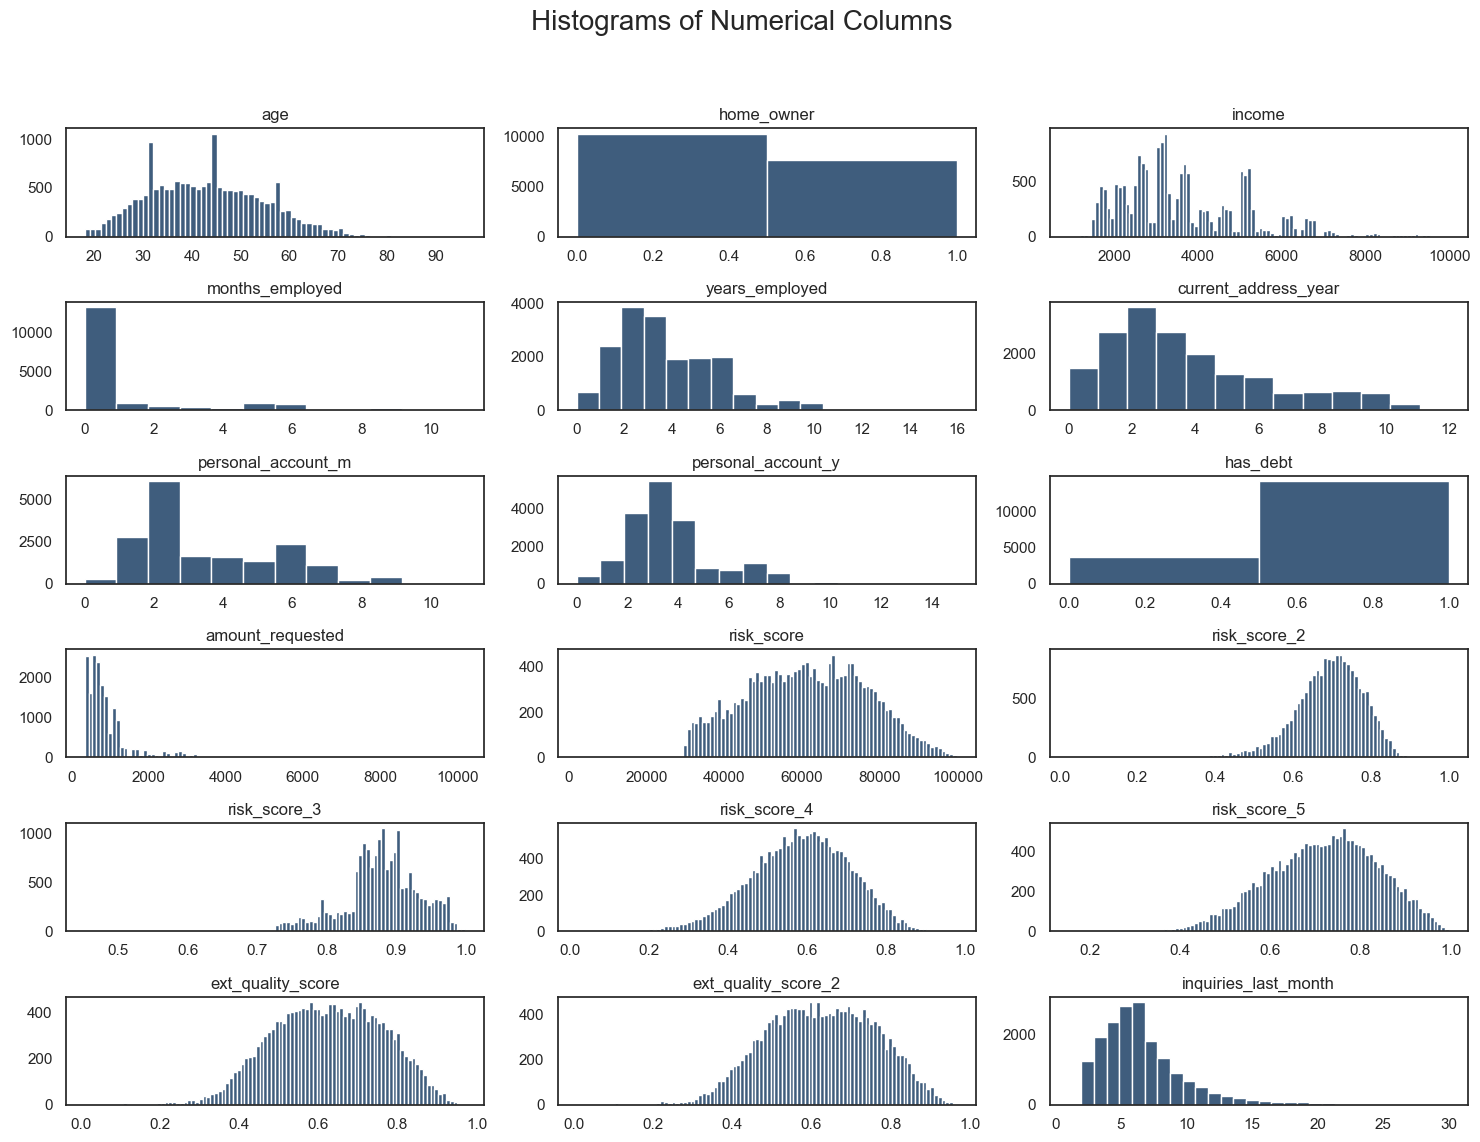

In [90]:
data2 = data.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(data2.columns.values[i])

    vals = np.size(data2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(data2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Step 4 Correlation Plot

<Axes: title={'center': 'Correlation with E_signed'}>

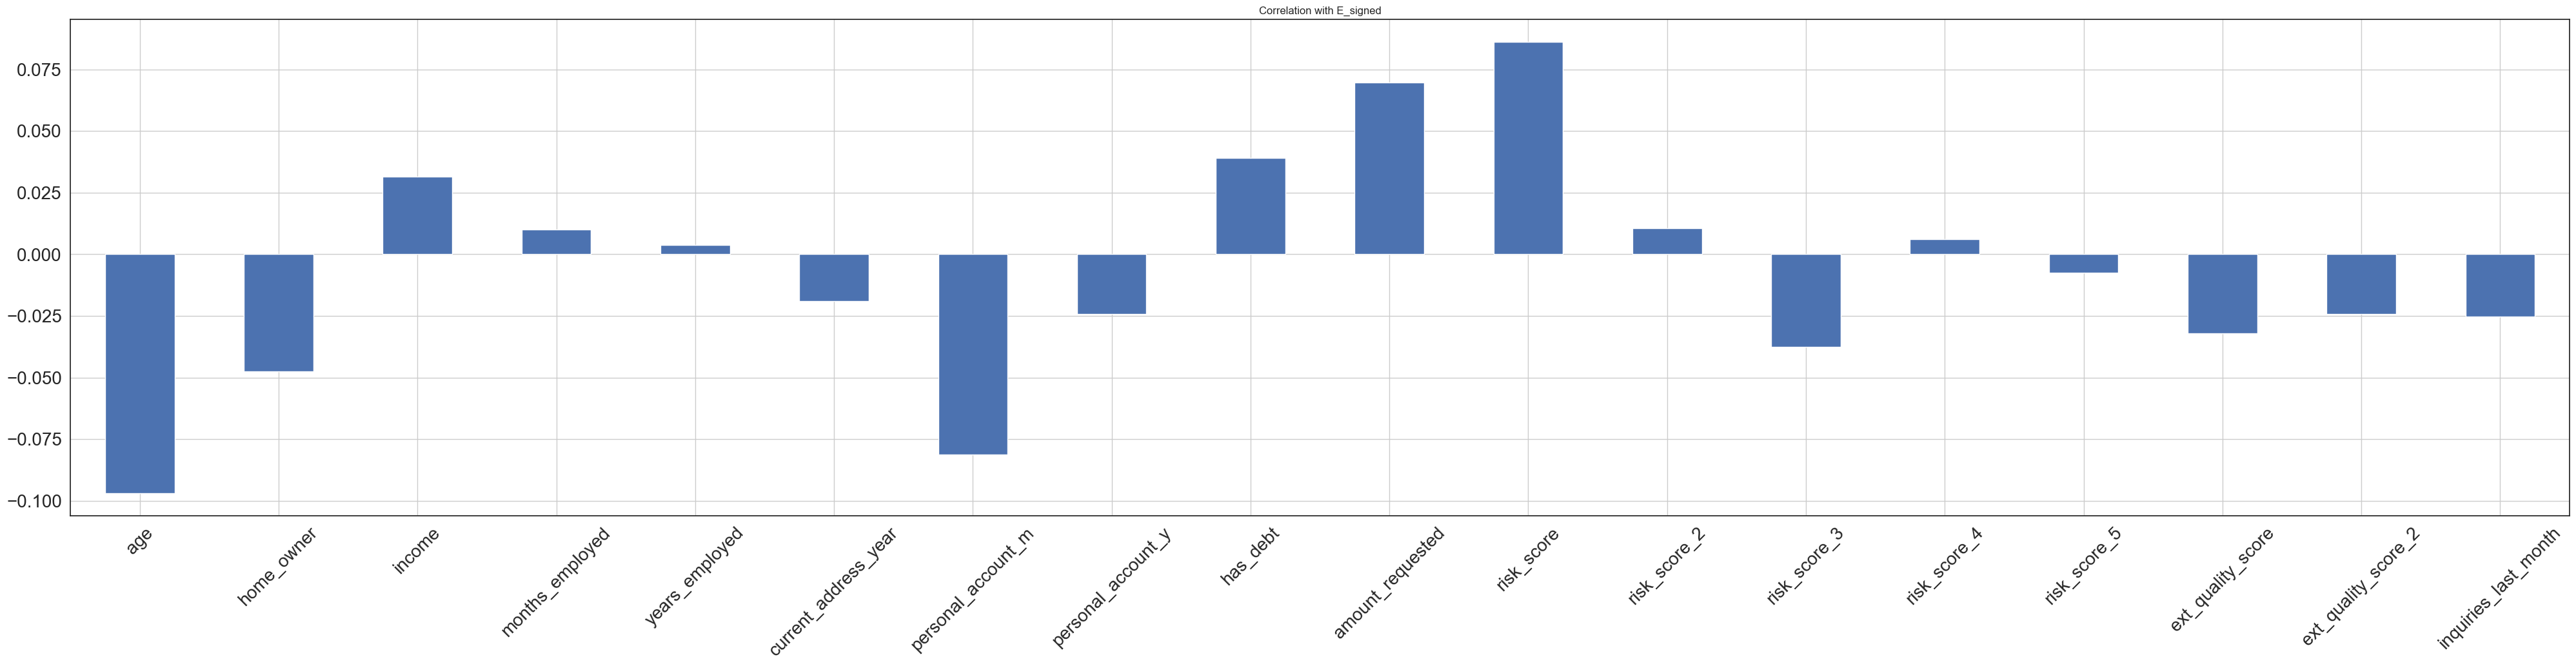

In [91]:
data2.corrwith(data.e_signed).plot.bar(
    figsize = (50, 10), title = 'Correlation with E_signed', fontsize = 20, rot = 45,
    grid = True)

### Step 5. Correlation Matrix

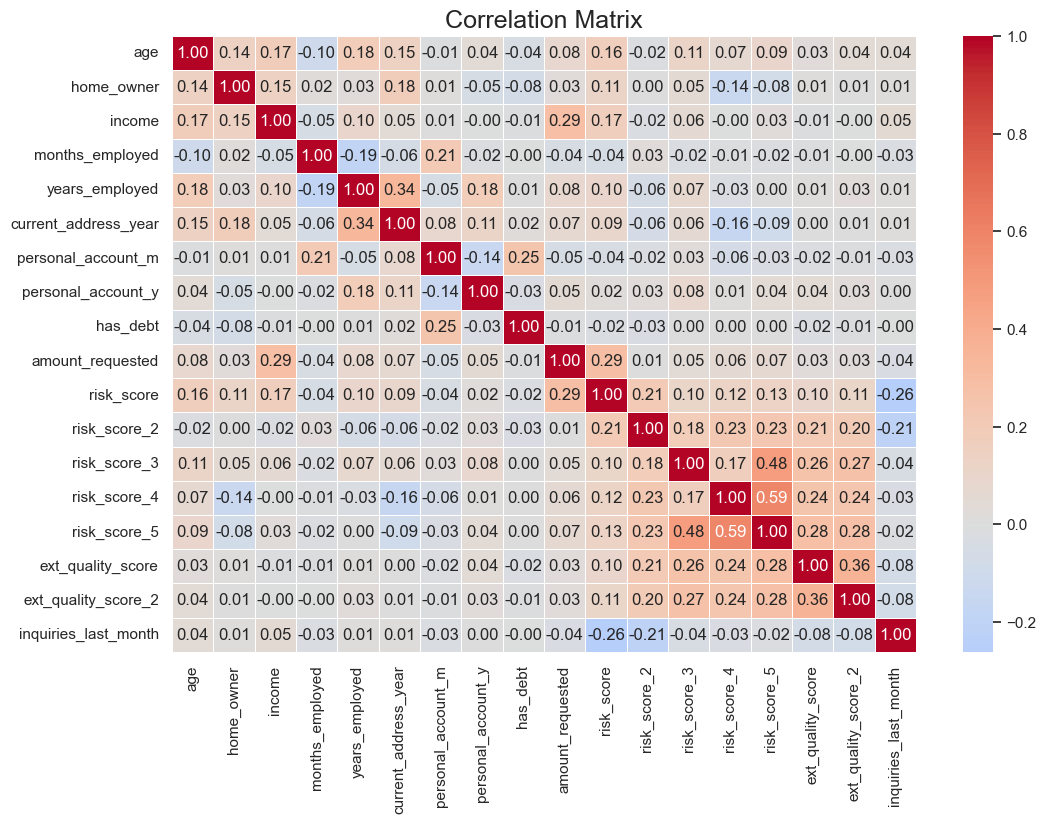

In [92]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sn.heatmap(corr, annot=True, cmap = 'coolwarm', center=0, linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Matrix', fontsize=18)
plt.show()

## Feature Engineering

### Step 6. 
As we can observe there are two columns personal account month and year here we can create new column of personal account months by some calculation and remove the original columns

In [94]:

data = data.drop(columns= ['months_employed'])
data['personal_account_months'] = (data.personal_account_m + (data.personal_account_y * 12))
data[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
data = data.drop(columns = ['personal_account_m', 'personal_account_y'])

## Data Preprocessing

### Step 7. One Hot Encoding


In [95]:
# One Hot Encoding
data = pd.get_dummies(data, drop_first= True)
data.columns


NameError: name 'dataset' is not defined

### Step 8. Removing Extra Columns

In [102]:
# Removing extra columns
response = data['e_signed']
users = data['entry_id']
data = data.drop(columns = ['e_signed', 'entry_id'])

### Step 9. Train Test Split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, response,
                                                    test_size= .20,
                                                    random_state= 0)

### Step 10. Scaling

In [110]:
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train), 
                       index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test), 
                      index=X_test.index, columns=X_test.columns)


## Model Building


### Step 11. Logistic Regression


In [139]:
# Logistic Regression (using lasso penalty)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,penalty = 'l1', solver='liblinear')
classifier.fit(X_train, y_train)

# Predicting Test set
y_pred = classifier.predict(X_test)

# classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# Perform 5-fold cross-validation on accuracy

cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}')

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = pd.concat([results, pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
                                           columns=results.columns)], ignore_index=True)


[[ 654 1000]
 [ 567 1361]]
Cross-Validation Accuracy: 0.5764351626885102 ± 0.005500785331246781


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19372\3707471671.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],


### Step 12. SVM

In [140]:

classifier = SVC( random_state = 0, kernel='linear')
classifier.fit(X_train, y_train)

# classification report
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Perform 5-fold cross-validation on accuracy
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}')

results = pd.concat([results, pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
                                           columns=results.columns)], ignore_index=True)


Cross-Validation Accuracy: 0.5804137087767886 ± 0.004275024653070752


### Step 13. Random Forest

In [156]:
classifier = RandomForestClassifier( random_state= 0, n_estimators= 100, criterion='entropy')
classifier.fit(X_train, y_train)

# classification report
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Perform 5-fold cross-validation on accuracy
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}')

results = pd.concat([results, pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
                                           columns=results.columns)], ignore_index=True)


KeyboardInterrupt: 

## Hyperparameter Tuning

### Step 12. Grid Search  (HyperParameter Tuning)

In [ ]:
# Round 1 : Entropy
param_distributions = {
        "n_estimators": [50, 100, 200, 500],             # Number of trees in the forest
        "max_depth": [3, 10, None],                      # Maximum depth of the tree
        "min_samples_split": [2, 5, 10],                 # Minimum samples required to split a node
        "min_samples_leaf": [1, 2, 4],                   # Minimum samples required at a leaf node
        "max_features": ['sqrt', 'log2'],        # Number of features to consider for the best split
        "bootstrap": [True, False]                       # Whether to use bootstrapping
            }

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier, 
    param_distributions=param_distributions, 
    n_iter=10,                    
    scoring='accuracy',           
    cv=5,                         
    random_state=0,               
    n_jobs=-1                     
)

In [ ]:
# Fit and time the process
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()

print(f"Randomized Search took {t1 - t0:.2f} seconds")

# Get the best accuracy and parameters
print(f"Best Accuracy: {random_search.best_score_}")
print(f"Best Parameters: {random_search.best_params_}")

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib

Randomized Search took 314.79 seconds
Best Accuracy: 0.6338825904965114
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


### Step 13. using entropy hyperparameters

In [159]:
# Predicting Test Set
y_pred = random_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [160]:
results = pd.concat([results, pd.DataFrame([['Random Forest (hyper parameter', acc, prec, rec, f1]],
                                           columns=results.columns)], ignore_index=True)


In [162]:
param_distribution = { "n_estimators": [50, 100, 200, 500], 
               "max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True,False],
              "criterion": ["gini"]}

In [163]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier, 
    param_distributions=param_distributions, 
    n_iter=10,                    
    scoring='accuracy',           
    cv=5,                         
    random_state=0,               
    n_jobs=-1                     
)

In [164]:
# Fit and time the process
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()

print(f"Randomized Search took {t1 - t0:.2f} seconds")

# Get the best accuracy and parameters
print(f"Best Accuracy: {random_search.best_score_}")
print(f"Best Parameters: {random_search.best_params_}")

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib

Randomized Search took 333.38 seconds
Best Accuracy: 0.6338825904965114
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [165]:
# Predicting Test Set
y_pred = random_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [166]:
results = pd.concat([results, pd.DataFrame([['Random Forest (hyper parameter + gini)', acc, prec, rec, f1]],
                                           columns=results.columns)], ignore_index=True)

In [167]:
print(results)

                                    Model  Accuracy  Precision    Recall  \
0             Logistic Regression (Lasso)  0.562535   0.576451  0.705913   
1                            SVM (Linear)  0.568956   0.578303  0.735477   
2                           Random Forest  0.568956   0.578303  0.735477   
3                           Random Forest  0.622278   0.641556  0.675830   
4          Random Forest (hyper parameter  0.629537   0.642215  0.703838   
5  Random Forest (hyper parameter + gini)  0.629537   0.642215  0.703838   

   F1 Score  
0  0.634647  
1  0.647489  
2  0.647489  
3  0.658247  
4  0.671616  
5  0.671616  


In [168]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [170]:
final_results.tail()

,entry_id,e_signed,predictions
7546,9384491,1.0,1
9836,2445124,1.0,1
7446,6534419,1.0,1
9526,5501730,1.0,1
13946,6683084,1.0,1


### **Project Conclusion (Summary)**  

Our model, with an accuracy of ~64%, helps predict whether a user will complete the e-signing step of the loan application. This prediction can be leveraged to enhance the onboarding process by targeting users less likely to finish the e-sign phase with customized onboarding. 

By providing tailored onboarding experiences, we aim to reduce user drop-off and guide more users toward completing the loan application. If we succeed in converting at least 40% of these predicted drop-offs, it will significantly boost the number of completed applications, leading to increased profits. Since lending companies generate revenue with every loan issued, improving conversion rates through intentional onboarding design has the potential to deliver substantial financial gains.